In [1]:
import os
os.chdir("D://Master//10. TFM//Data")

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [3]:
df = pd.read_csv("df.csv")
df.head()

,Unnamed: 0,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,payment_type,payment_value,product_category_name,order_status,review_score,year,month,day_of_week,hour
0,0,28013,campos dos goytacazes,RJ,58.9,13.29,credit_card,72.19,cool_stuff,delivered,5,2017,9,2,8
1,1,75800,jatai,GO,55.9,17.96,boleto,73.86,cool_stuff,delivered,5,2017,6,2,11
2,2,30720,belo horizonte,MG,64.9,18.33,credit_card,83.23,cool_stuff,delivered,4,2018,5,4,10
3,3,83070,sao jose dos pinhais,PR,58.9,16.17,credit_card,75.07,cool_stuff,delivered,5,2017,8,1,18
4,4,36400,conselheiro lafaiete,MG,58.9,13.29,credit_card,72.19,cool_stuff,delivered,5,2017,8,3,21


Eliminamos la variable unnamed que se ha generado con el csv y la variable customer_zip_code_prefix que, siendo categórica, presenta muchos valores distintos y puede perjudicar la calidad de los resultados.

In [4]:
df = df.drop("Unnamed: 0", axis=1)

In [5]:
df = df.drop("customer_zip_code_prefix", axis=1)

In [6]:
df = df.drop("order_status", axis=1)

In [7]:
df = df.drop("hour", axis=1)

In [8]:
df.head()

,customer_city,customer_state,price,freight_value,payment_type,payment_value,product_category_name,review_score,year,month,day_of_week
0,campos dos goytacazes,RJ,58.9,13.29,credit_card,72.19,cool_stuff,5,2017,9,2
1,jatai,GO,55.9,17.96,boleto,73.86,cool_stuff,5,2017,6,2
2,belo horizonte,MG,64.9,18.33,credit_card,83.23,cool_stuff,4,2018,5,4
3,sao jose dos pinhais,PR,58.9,16.17,credit_card,75.07,cool_stuff,5,2017,8,1
4,conselheiro lafaiete,MG,58.9,13.29,credit_card,72.19,cool_stuff,5,2017,8,3


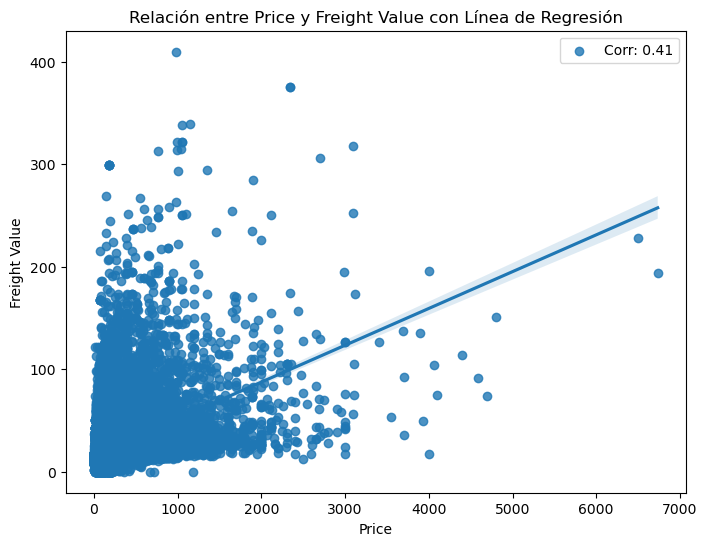

In [9]:
from scipy.stats import pearsonr

# Calcular el coeficiente de correlación
corr_coef, _ = pearsonr(df['price'], df['freight_value'])

# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x='price', y='freight_value', data=df, label=f'Corr: {corr_coef:.2f}')
plt.title('Relación entre Price y Freight Value con Línea de Regresión')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.legend()
plt.show()

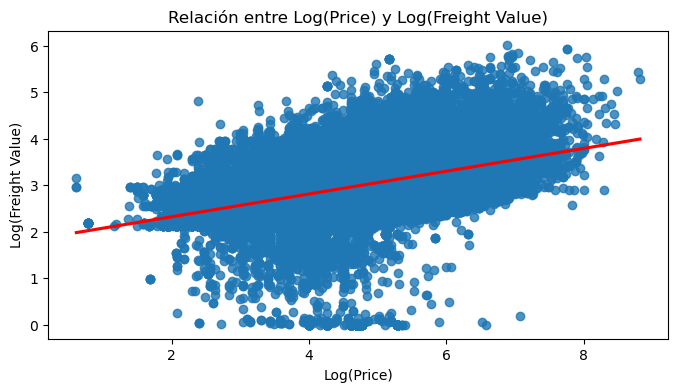

In [10]:
df_log = pd.DataFrame()
df_log['log_price'] = np.log1p(df['price'])
df_log['log_freight_value'] = np.log1p(df['freight_value'])

# Crear el gráfico de dispersión con la transformación logarítmica y cambiar el color de la línea de regresión
plt.figure(figsize=(8, 4))
sns.regplot(x='log_price', y='log_freight_value', data=df_log, line_kws={'color': 'red'})
plt.title('Relación entre Log(Price) y Log(Freight Value)')
plt.xlabel('Log(Price)')
plt.ylabel('Log(Freight Value)')
plt.show()

Ahora, vamos a transformar cada variable categórica en una variable dummy que pueda ser utilizada en los análisis posteriores.

In [11]:
X = df.copy()

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110757 entries, 0 to 110756
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_city          110757 non-null  object 
 1   customer_state         110757 non-null  object 
 2   price                  110757 non-null  float64
 3   freight_value          110757 non-null  float64
 4   payment_type           110757 non-null  object 
 5   payment_value          110757 non-null  float64
 6   product_category_name  110757 non-null  object 
 7   review_score           110757 non-null  int64  
 8   year                   110757 non-null  int64  
 9   month                  110757 non-null  int64  
 10  day_of_week            110757 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 9.3+ MB


In [13]:
X['customer_city'].nunique()

4093

In [14]:
top_cities = X['customer_city'].value_counts().nlargest(10).index

In [15]:
X['customer_city'] = X['customer_city'].apply(lambda x: x if x in top_cities else 'otras ciudades')

In [16]:
X['customer_city'].value_counts().head(11)

otras ciudades           71480
sao paulo                17496
rio de janeiro            7659
belo horizonte            3095
brasilia                  2370
curitiba                  1732
campinas                  1621
porto alegre              1591
salvador                  1366
guarulhos                 1299
sao bernardo do campo     1048
Name: customer_city, dtype: int64

In [17]:
X = pd.get_dummies(X, columns=['customer_city'], prefix='city')

In [18]:
X = pd.get_dummies(X, columns=['customer_state'], prefix='state')

In [19]:
X['product_category_name'].nunique()

73

In [20]:
top_categories = X['product_category_name'].value_counts().nlargest(10).index
top_categories

Index(['cama_mesa_banho', 'beleza_saude', 'esporte_lazer', 'moveis_decoracao',
       'informatica_acessorios', 'utilidades_domesticas', 'relogios_presentes',
       'telefonia', 'ferramentas_jardim', 'automotivo'],
      dtype='object')

In [21]:
X['product_category_name'] = X['product_category_name'].apply(lambda x: x if x in top_categories else 'otras categorias')

In [22]:
X['product_category_name'].value_counts().head(5)

otras categorias    39215
cama_mesa_banho     11136
beleza_saude         9642
esporte_lazer        8638
moveis_decoracao     8328
Name: product_category_name, dtype: int64

In [23]:
X = pd.get_dummies(X, columns=['product_category_name'], prefix='category')

In [24]:
X = pd.get_dummies(X, columns=['payment_type'], prefix='payment')

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110757 entries, 0 to 110756
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   price                            110757 non-null  float64
 1   freight_value                    110757 non-null  float64
 2   payment_value                    110757 non-null  float64
 3   review_score                     110757 non-null  int64  
 4   year                             110757 non-null  int64  
 5   month                            110757 non-null  int64  
 6   day_of_week                      110757 non-null  int64  
 7   city_belo horizonte              110757 non-null  uint8  
 8   city_brasilia                    110757 non-null  uint8  
 9   city_campinas                    110757 non-null  uint8  
 10  city_curitiba                    110757 non-null  uint8  
 11  city_guarulhos                   110757 non-null  uint8  
 12  ci

In [26]:
X['month']=X['month'].astype(np.int16)
X['day_of_week']=X['day_of_week'].astype(np.int16)
X['year']=X['year'].astype(np.int16)

In [27]:
X

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,58.9,13.29,72.19,5,2017,9,2,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,55.9,17.96,73.86,5,2017,6,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,64.9,18.33,83.23,4,2018,5,4,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,58.9,16.17,75.07,5,2017,8,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,58.9,13.29,72.19,5,2017,8,3,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,129.9,51.20,181.10,5,2018,7,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
110753,99.0,13.52,112.52,4,2018,8,5,0,0,0,...,1,0,0,0,0,0,1,0,0,0
110754,736.0,20.91,756.91,5,2017,6,3,0,0,0,...,0,0,1,0,0,0,1,0,0,0
110755,229.9,44.02,273.92,4,2017,12,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
X.nunique()

price                   5882
freight_value           6954
payment_value          27306
review_score               5
year                       3
                       ...  
payment_boleto             2
payment_credit_card        2
payment_debit_card         2
payment_varios             2
payment_voucher            2
Length: 61, dtype: int64

### Estandarización

In [29]:
scaler = StandardScaler()
x_scaler = scaler.fit(X)

In [30]:
x_estandarizado = ( X - X.mean() ) / X.std()

In [31]:
x_estandarizado

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,-0.338623,-0.425090,-0.397569,0.696347,-1.076442,0.920661,-0.380505,-0.169550,-0.147871,-0.121872,...,-0.285139,1.350680,-0.238266,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346
1,-0.355113,-0.129798,-0.391409,0.696347,-1.076442,-0.009442,-0.380505,-0.169550,-0.147871,-0.121872,...,-0.285139,1.350680,-0.238266,-0.206148,-0.258609,1.980364,-1.696793,-0.12339,-0.172902,-0.10346
2,-0.305641,-0.106403,-0.356849,-0.025469,0.905068,-0.319476,0.638195,5.897921,-0.147871,-0.121872,...,-0.285139,1.350680,-0.238266,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346
3,-0.338623,-0.242983,-0.386947,0.696347,-1.076442,0.610627,-0.889856,-0.169550,-0.147871,-0.121872,...,-0.285139,1.350680,-0.238266,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346
4,-0.338623,-0.425090,-0.397569,0.696347,-1.076442,0.610627,0.128845,-0.169550,-0.147871,-0.121872,...,-0.285139,1.350680,-0.238266,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,0.051660,1.972017,0.004132,0.696347,0.905068,0.300593,0.638195,-0.169550,-0.147871,-0.121872,...,-0.285139,-0.740361,-0.238266,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346
110753,-0.118195,-0.410546,-0.248817,-0.025469,0.905068,0.610627,1.147545,-0.169550,-0.147871,-0.121872,...,3.507027,-0.740361,-0.238266,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346
110754,3.383356,0.056735,2.127933,0.696347,-1.076442,-0.009442,0.128845,-0.169550,-0.147871,-0.121872,...,-0.285139,-0.740361,4.196959,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346
110755,0.601354,1.518015,0.346486,-0.025469,-1.076442,1.850764,-1.399206,-0.169550,-0.147871,-0.121872,...,-0.285139,-0.740361,-0.238266,-0.206148,-0.258609,-0.504953,0.589342,-0.12339,-0.172902,-0.10346


In [32]:
X.describe()

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
count,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,...,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.00000,110757.000000,110757.000000,110757.000000
mean,120.502017,20.012748,179.979834,4.035284,2017.543243,6.030454,2.747041,0.027944,0.021398,0.014636,...,0.075192,0.354063,0.053721,0.040765,0.062687,0.203175,0.74221,0.014997,0.029028,0.010591
std,181.919374,15.814897,271.122309,1.385395,0.504665,3.225449,1.963285,0.164813,0.144708,0.120090,...,0.263702,0.478231,0.225468,0.197746,0.242400,0.402363,0.43742,0.121540,0.167884,0.102365
min,0.850000,0.000000,9.590000,1.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,39.900000,13.080000,65.690000,4.000000,2017.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,74.900000,16.290000,114.180000,5.000000,2018.000000,6.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,134.900000,21.170000,195.690000,5.000000,2018.000000,8.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
max,6735.000000,409.680000,13664.080000,5.000000,2018.000000,12.000000,6.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [33]:
x_estandarizado.describe()

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
count,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,...,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05,1.107570e+05
mean,4.105811e-17,-8.416913e-17,-2.155551e-17,2.989544e-17,1.793631e-13,-5.902104e-17,-9.148261e-17,2.027244e-17,-7.602166e-18,4.259779e-17,...,-2.001583e-17,-5.927765e-17,6.979879e-17,-3.079359e-17,-1.103437e-16,-5.388877e-18,4.798667e-17,-1.440242e-17,4.054489e-17,-4.696022e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.577200e-01,-1.265437e+00,-6.284611e-01,-2.190916e+00,-3.057953e+00,-1.559614e+00,-1.399206e+00,-1.695497e-01,-1.478712e-01,-1.218724e-01,...,-2.851392e-01,-7.403611e-01,-2.382656e-01,-2.061478e-01,-2.586090e-01,-5.049531e-01,-1.696793e+00,-1.233896e-01,-1.729018e-01,-1.034602e-01
25%,-4.430645e-01,-4.383682e-01,-4.215435e-01,-2.546888e-02,-1.076442e+00,-9.395449e-01,-8.898558e-01,-1.695497e-01,-1.478712e-01,-1.218724e-01,...,-2.851392e-01,-7.403611e-01,-2.382656e-01,-2.061478e-01,-2.586090e-01,-5.049531e-01,-1.696793e+00,-1.233896e-01,-1.729018e-01,-1.034602e-01
50%,-2.506716e-01,-2.353950e-01,-2.426943e-01,6.963470e-01,9.050683e-01,-9.441804e-03,1.288448e-01,-1.695497e-01,-1.478712e-01,-1.218724e-01,...,-2.851392e-01,-7.403611e-01,-2.382656e-01,-2.061478e-01,-2.586090e-01,-5.049531e-01,5.893417e-01,-1.233896e-01,-1.729018e-01,-1.034602e-01
75%,7.914486e-02,7.317479e-02,5.794494e-02,6.963470e-01,9.050683e-01,6.106269e-01,6.381951e-01,-1.695497e-01,-1.478712e-01,-1.218724e-01,...,-2.851392e-01,1.350680e+00,-2.382656e-01,-2.061478e-01,-2.586090e-01,-5.049531e-01,5.893417e-01,-1.233896e-01,-1.729018e-01,-1.034602e-01
max,3.635950e+01,2.463925e+01,4.973438e+01,6.963470e-01,9.050683e-01,1.850764e+00,1.656896e+00,5.897921e+00,6.762581e+00,8.205226e+00,...,3.507027e+00,1.350680e+00,4.196959e+00,4.850844e+00,3.866806e+00,1.980364e+00,5.893417e-01,8.104340e+00,5.783578e+00,9.665462e+00


In [34]:
x_estandarizado.corr(method='pearson')

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
price,1.000000,0.412875,0.761766,-0.004421,-0.002269,0.001461,0.002555,-0.006973,0.005019,-0.003842,...,-0.051557,0.049876,0.105787,-0.056234,-0.042299,-0.045526,0.048088,-0.007795,0.005443,-0.026207
freight_value,0.412875,1.000000,0.385303,-0.037308,0.033146,0.004760,0.004507,-0.005957,0.010394,-0.038380,...,0.012765,0.058644,-0.048710,-0.056319,0.016064,-0.009213,0.012670,-0.010385,0.007770,-0.018338
payment_value,0.761766,0.385303,1.000000,-0.085252,0.000858,0.004513,-0.005403,-0.012756,0.000342,-0.008222,...,-0.009087,0.032221,0.051666,-0.055585,-0.021692,-0.005609,0.016424,-0.013285,-0.001352,-0.030143
review_score,-0.004421,-0.037308,-0.085252,1.000000,-0.008161,0.031771,-0.010972,0.002088,-0.003991,0.001400,...,-0.027132,0.027232,-0.002773,-0.013160,0.003684,-0.002430,0.000066,0.010799,-0.001531,-0.001043
year,-0.002269,0.033146,0.000858,-0.008161,1.000000,-0.553535,-0.017049,0.002894,0.004638,0.002742,...,-0.033253,-0.021297,0.034970,-0.012915,0.018102,-0.025238,0.020846,0.043965,-0.022222,-0.005632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
payment_boleto,-0.045526,-0.009213,-0.005609,-0.002430,-0.025238,0.001563,-0.049955,-0.011958,-0.005819,0.003672,...,0.003826,-0.004762,-0.019197,0.010969,-0.008576,1.000000,-0.856809,-0.062307,-0.087308,-0.052243
payment_credit_card,0.048088,0.012670,0.016424,0.000066,0.020846,-0.004335,0.046917,0.014134,0.009123,-0.002771,...,-0.004237,0.002729,0.020859,-0.012534,0.002370,-0.856809,1.000000,-0.209368,-0.293381,-0.175552
payment_debit_card,-0.007795,-0.010385,-0.013285,0.010799,0.043965,0.007218,0.000195,-0.001539,-0.009519,0.002901,...,-0.006449,-0.000015,-0.008643,0.004617,0.003027,-0.062307,-0.209368,1.000000,-0.021334,-0.012766
payment_varios,0.005443,0.007770,-0.001352,-0.001531,-0.022222,0.003870,0.000336,-0.005821,-0.004012,-0.002263,...,0.004947,0.001089,-0.001124,0.001072,0.008977,-0.087308,-0.293381,-0.021334,1.000000,-0.017889


In [35]:
x_estandarizado.corr(method='pearson').head()

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
price,1.000000,0.412875,0.761766,-0.004421,-0.002269,0.001461,0.002555,-0.006973,0.005019,-0.003842,...,-0.051557,0.049876,0.105787,-0.056234,-0.042299,-0.045526,0.048088,-0.007795,0.005443,-0.026207
freight_value,0.412875,1.000000,0.385303,-0.037308,0.033146,0.004760,0.004507,-0.005957,0.010394,-0.038380,...,0.012765,0.058644,-0.048710,-0.056319,0.016064,-0.009213,0.012670,-0.010385,0.007770,-0.018338
payment_value,0.761766,0.385303,1.000000,-0.085252,0.000858,0.004513,-0.005403,-0.012756,0.000342,-0.008222,...,-0.009087,0.032221,0.051666,-0.055585,-0.021692,-0.005609,0.016424,-0.013285,-0.001352,-0.030143
review_score,-0.004421,-0.037308,-0.085252,1.000000,-0.008161,0.031771,-0.010972,0.002088,-0.003991,0.001400,...,-0.027132,0.027232,-0.002773,-0.013160,0.003684,-0.002430,0.000066,0.010799,-0.001531,-0.001043
year,-0.002269,0.033146,0.000858,-0.008161,1.000000,-0.553535,-0.017049,0.002894,0.004638,0.002742,...,-0.033253,-0.021297,0.034970,-0.012915,0.018102,-0.025238,0.020846,0.043965,-0.022222,-0.005632


Se observa una gran correlación entre las variables price, freight_value y payment_value. Como Payment_value es la suma de price y freight_value, podemos eliminarla de cara al análisis.

In [36]:
x_estandarizado = x_estandarizado.drop("payment_value", axis=1)

In [37]:
x_estandarizado = x_estandarizado.drop("freight_value", axis=1)

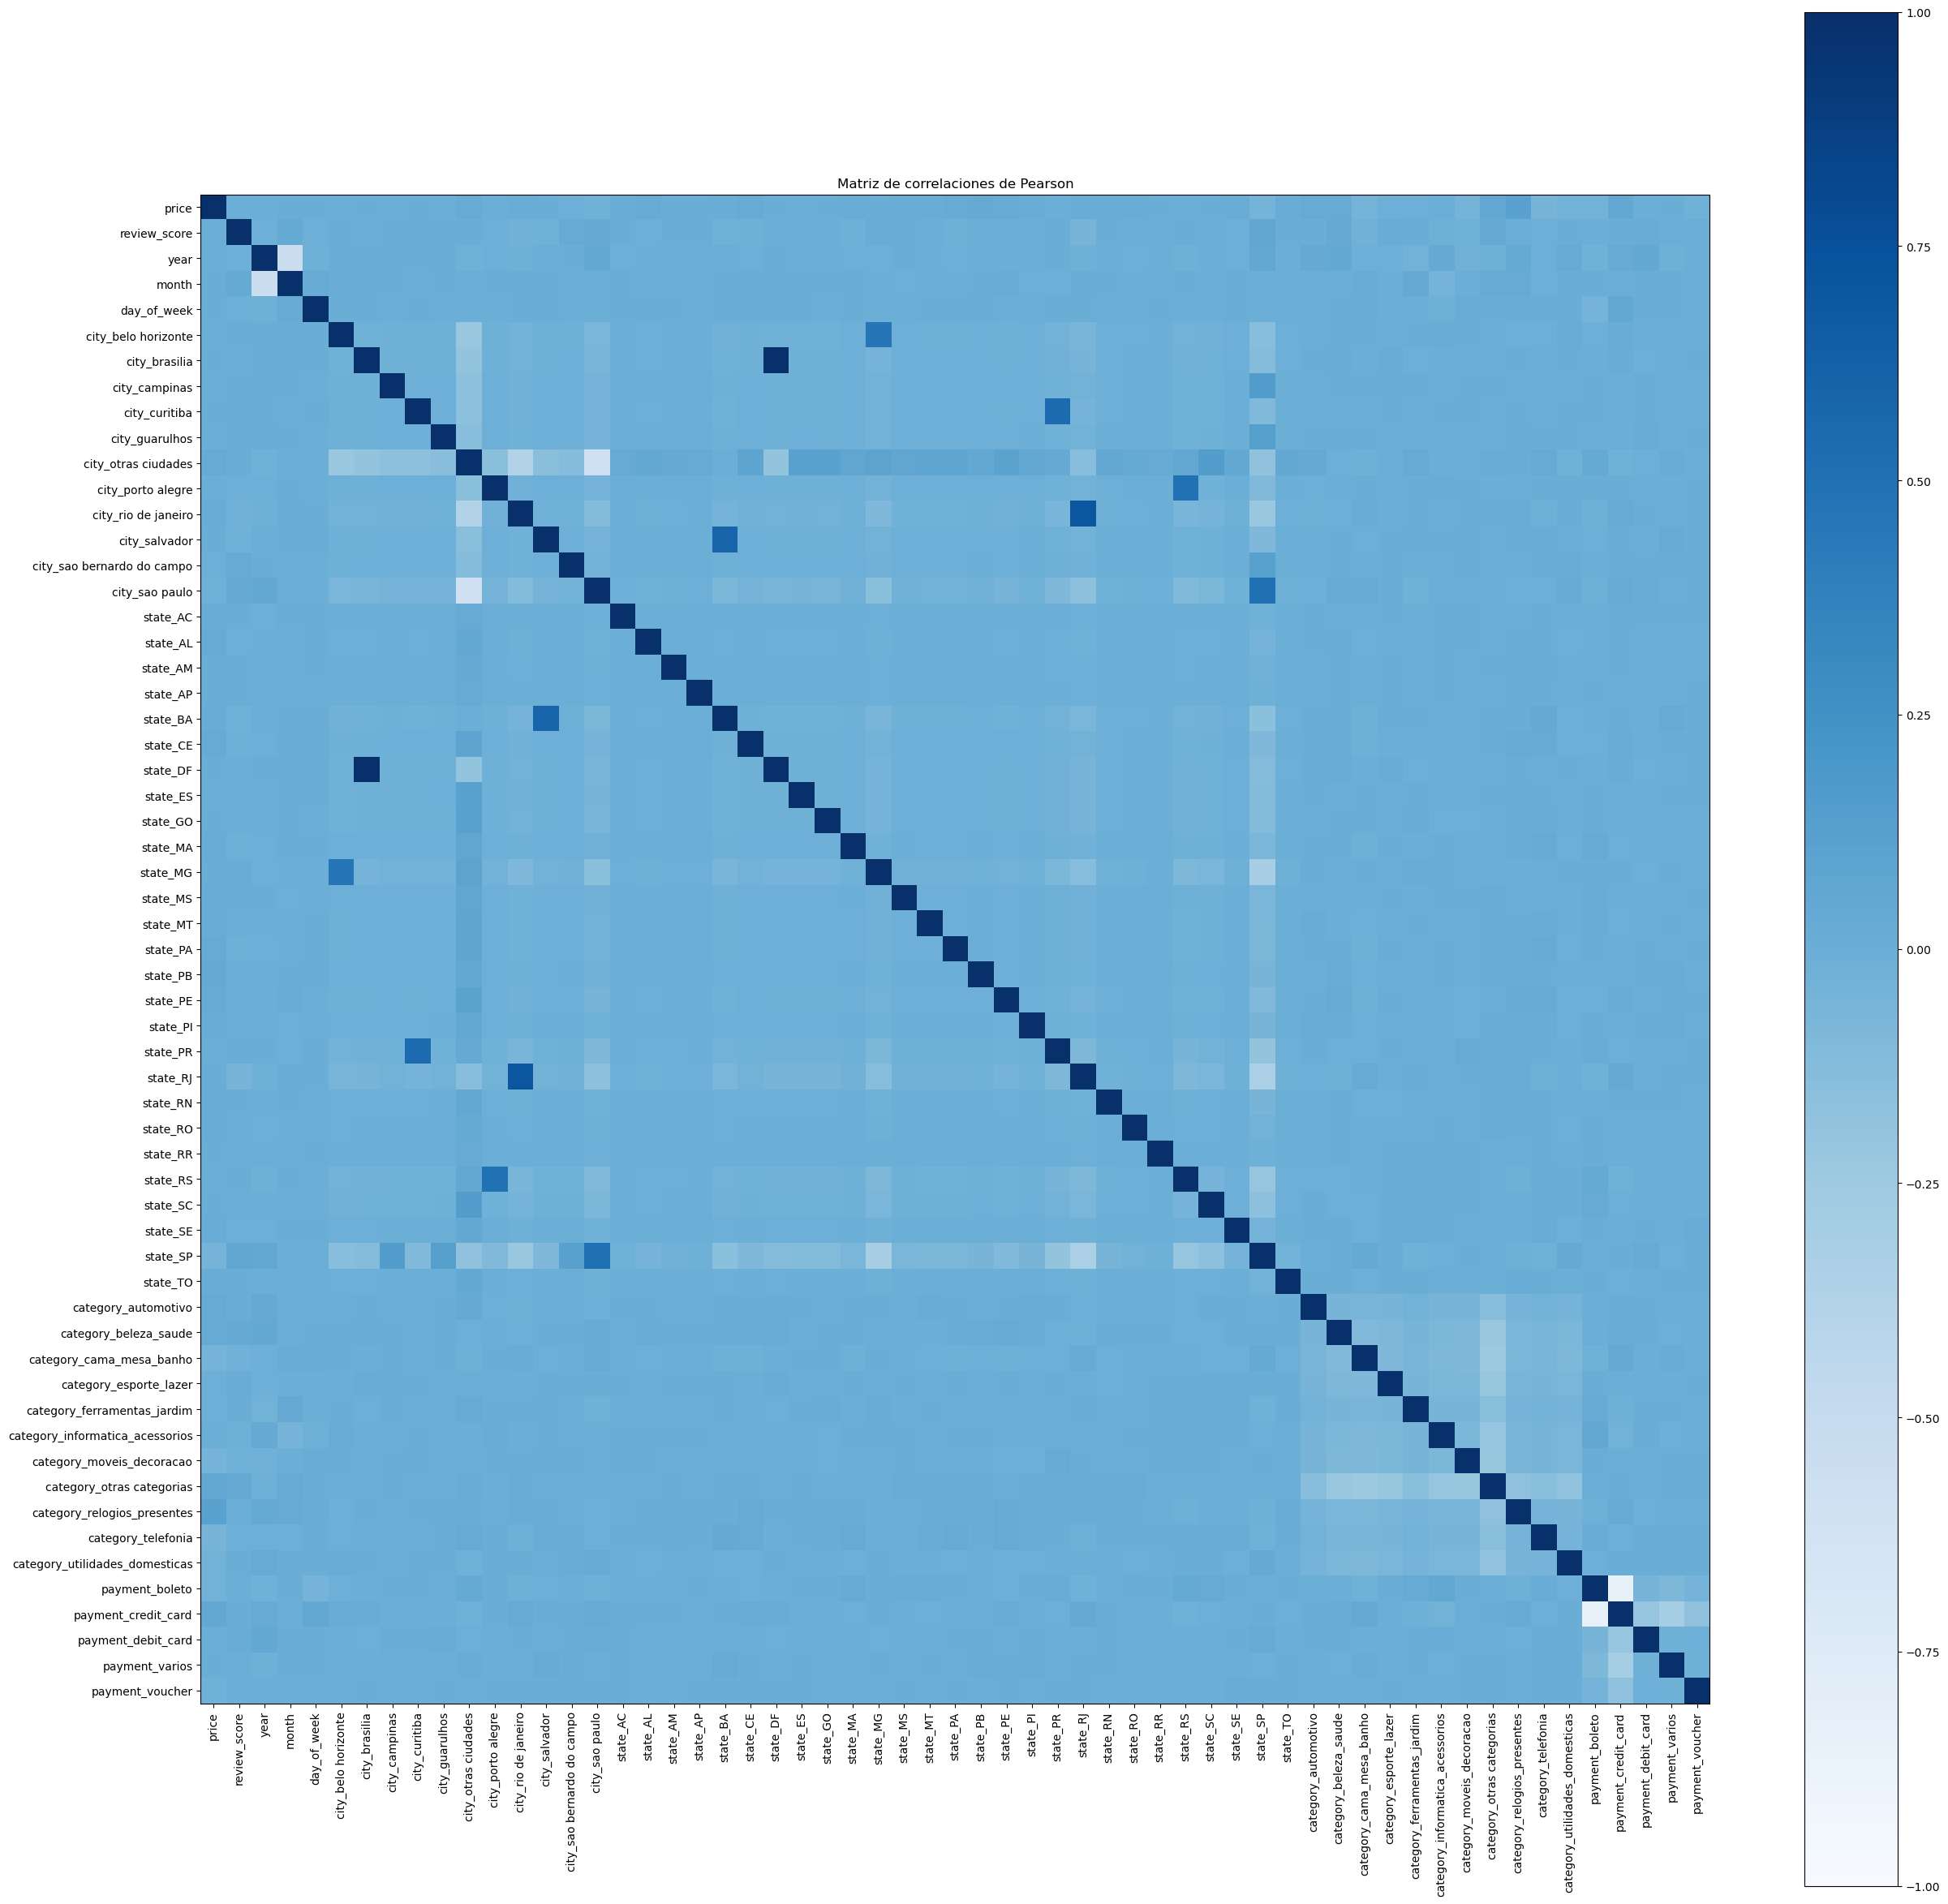

In [38]:
matriz_correlaciones = x_estandarizado.corr(method='pearson')
n_ticks = len(x_estandarizado.columns)
plt.figure( figsize=(30, 30) )
plt.xticks(range(n_ticks), x_estandarizado.columns, rotation='vertical')
plt.yticks(range(n_ticks), x_estandarizado.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

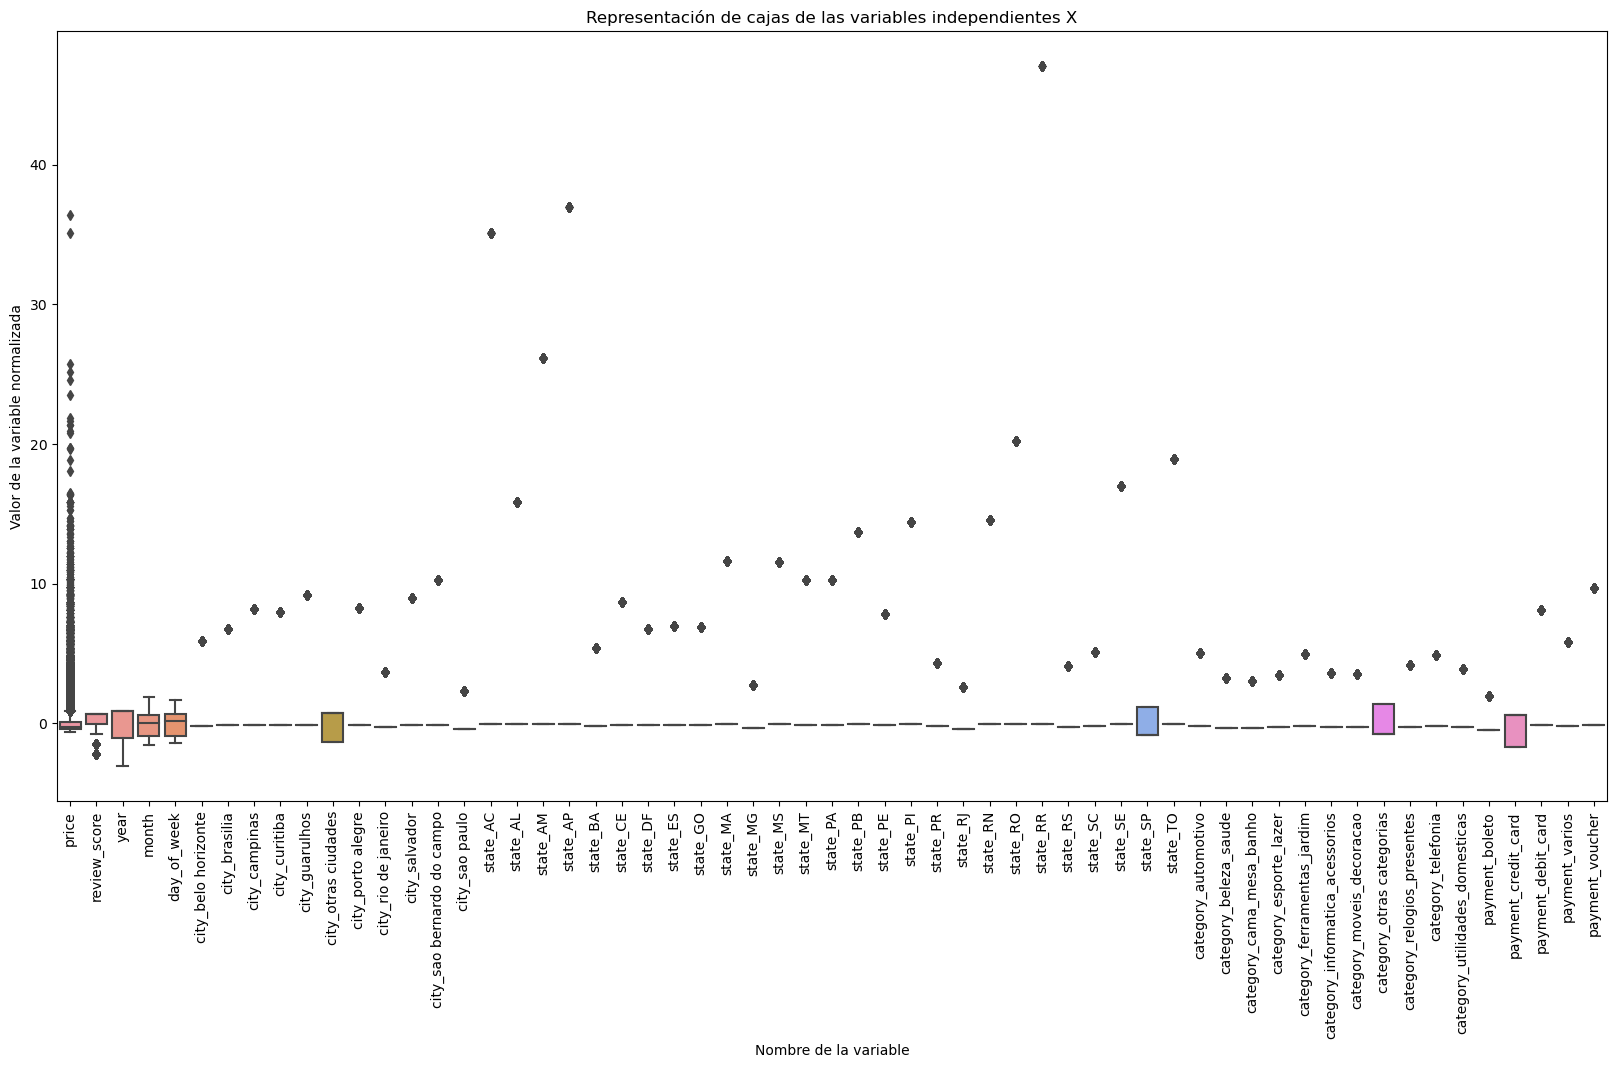

In [39]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=x_estandarizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

In [40]:
X.describe()

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
count,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,...,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.00000,110757.000000,110757.000000,110757.000000
mean,120.502017,20.012748,179.979834,4.035284,2017.543243,6.030454,2.747041,0.027944,0.021398,0.014636,...,0.075192,0.354063,0.053721,0.040765,0.062687,0.203175,0.74221,0.014997,0.029028,0.010591
std,181.919374,15.814897,271.122309,1.385395,0.504665,3.225449,1.963285,0.164813,0.144708,0.120090,...,0.263702,0.478231,0.225468,0.197746,0.242400,0.402363,0.43742,0.121540,0.167884,0.102365
min,0.850000,0.000000,9.590000,1.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,39.900000,13.080000,65.690000,4.000000,2017.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,74.900000,16.290000,114.180000,5.000000,2018.000000,6.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,134.900000,21.170000,195.690000,5.000000,2018.000000,8.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
max,6735.000000,409.680000,13664.080000,5.000000,2018.000000,12.000000,6.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [41]:
for k in list(x_estandarizado.columns):
    IQR = np.percentile(x_estandarizado[k],75) - np.percentile(x_estandarizado[k],25)
    
    limite_superior = np.percentile(x_estandarizado[k],75) + 1.5*IQR
    limite_inferior = np.percentile(x_estandarizado[k],25) - 1.5*IQR
    
    x_estandarizado[k] = np.where(x_estandarizado[k] > limite_superior,limite_superior,x_estandarizado[k])
    x_estandarizado[k] = np.where(x_estandarizado[k] < limite_inferior,limite_inferior,x_estandarizado[k])

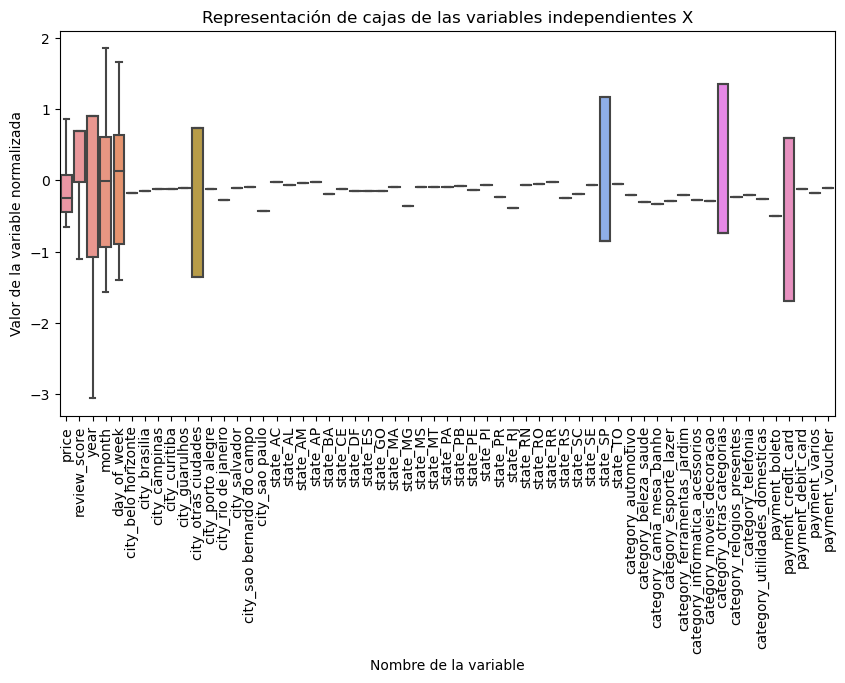

In [42]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=x_estandarizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

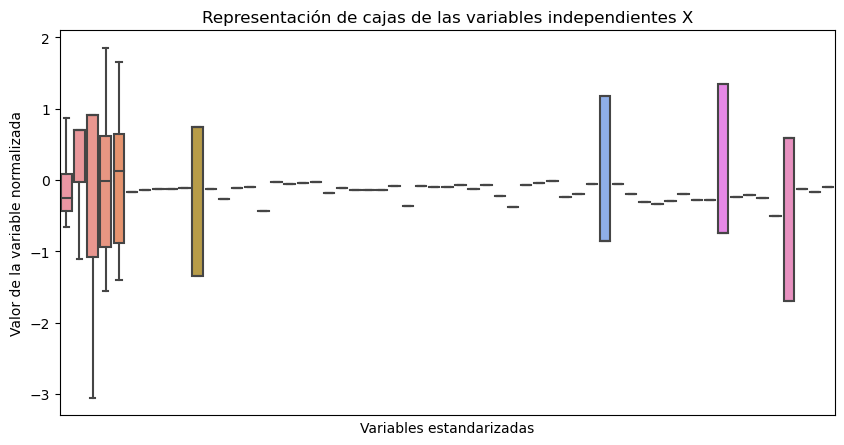

In [43]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=x_estandarizado)
ax.set_xticks([])
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Variables estandarizadas')

Observamos la existencia de outliers o valores atípicos en variables como la del precio, precio del porte, pago total y estado del pedido.

Comprobamos la normalidad de las variables

In [44]:
from scipy.stats import anderson

for column in x_estandarizado.columns:
    data = x_estandarizado[column]
    result = anderson(data)

    print(f'Columna: {column}')
    print(f'  Estadístico de prueba: {result.statistic}')
    print(f'  Valores críticos: {result.critical_values}')
    
    alpha = 0.05
    for i, cv in enumerate(result.critical_values):
        if result.statistic < cv:
            print(f'  No podemos rechazar la hipótesis nula en el nivel de significancia {result.significance_level[i]}%. Los datos parecen provenir de una distribución normal.')
            break
    else:
        print("  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.")


Columna: price
  Estadístico de prueba: 4734.346034523362
  Valores críticos: [0.576 0.656 0.787 0.918 1.092]
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.
Columna: review_score
  Estadístico de prueba: 13438.585037767349
  Valores críticos: [0.576 0.656 0.787 0.918 1.092]
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.
Columna: year
  Estadístico de prueba: 19558.131363089356
  Valores críticos: [0.576 0.656 0.787 0.918 1.092]
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.
Columna: month
  Estadístico de prueba: 1309.5246634692885
  Valores críticos: [0.576 0.656 0.787 0.918 1.092]
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.
Columna: day_of_week
  Estadístico de prueba: 2547.5028320531565
  Valores críticos: [0.576 0.656 0.787 0.918 1.092]
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distr

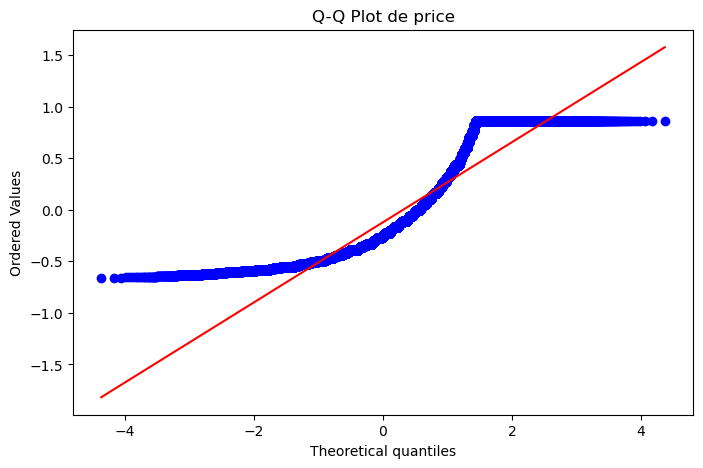

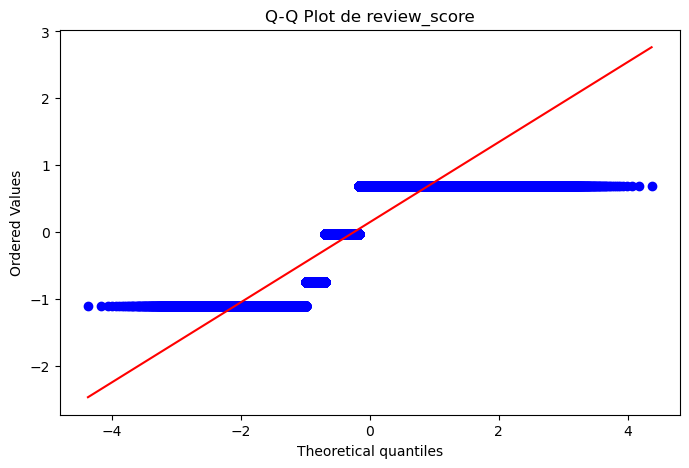

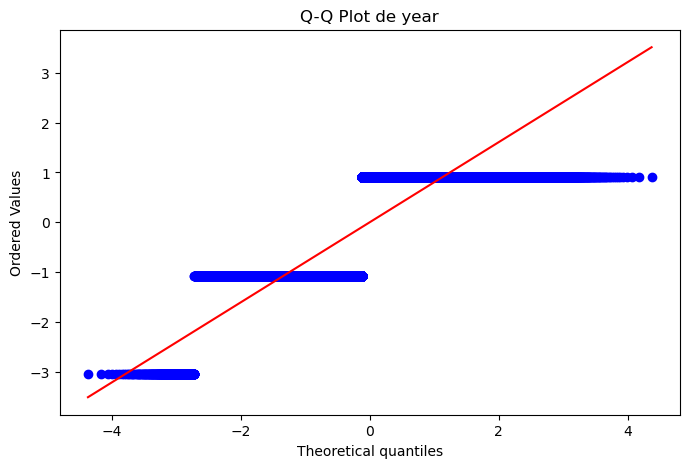

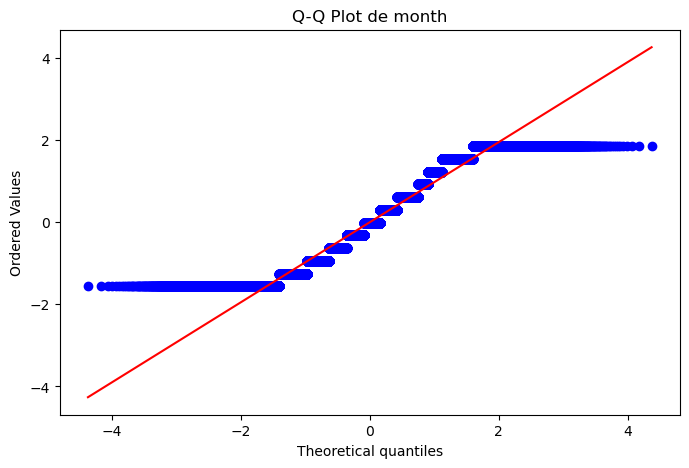

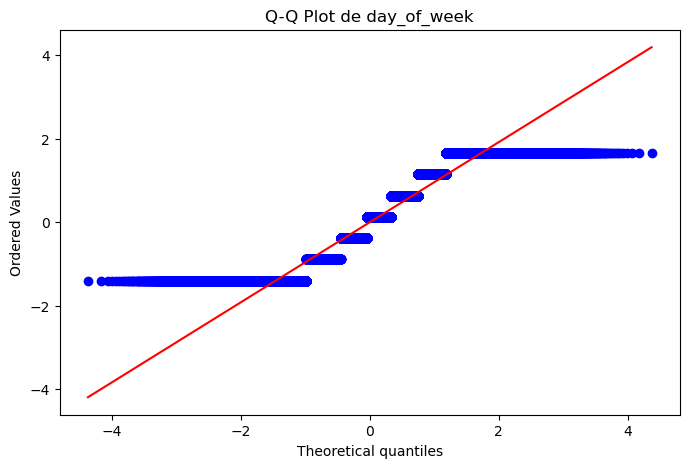

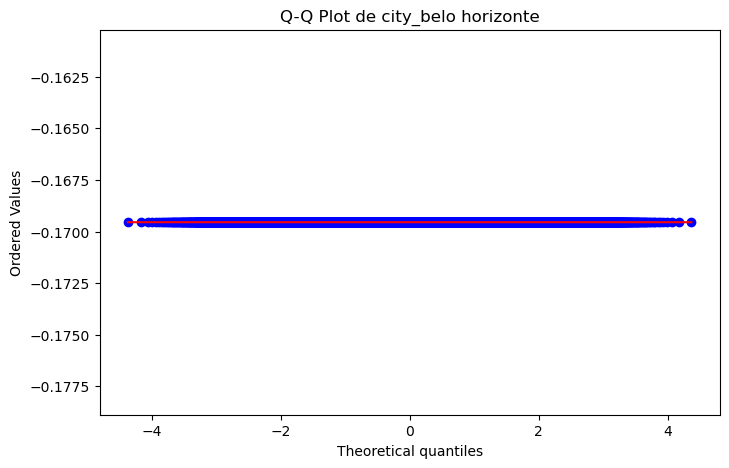

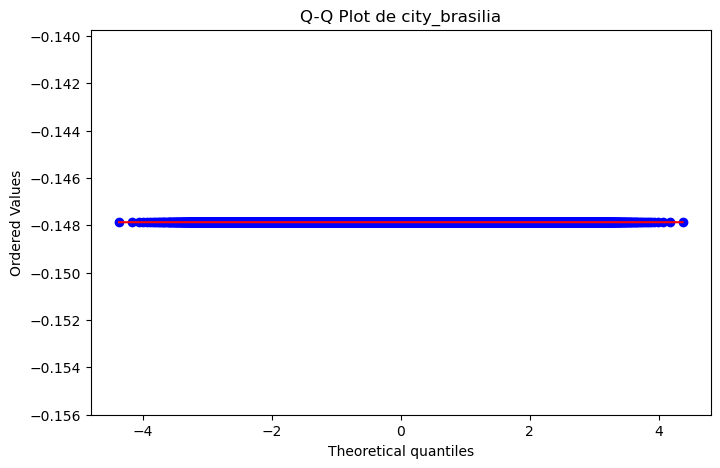

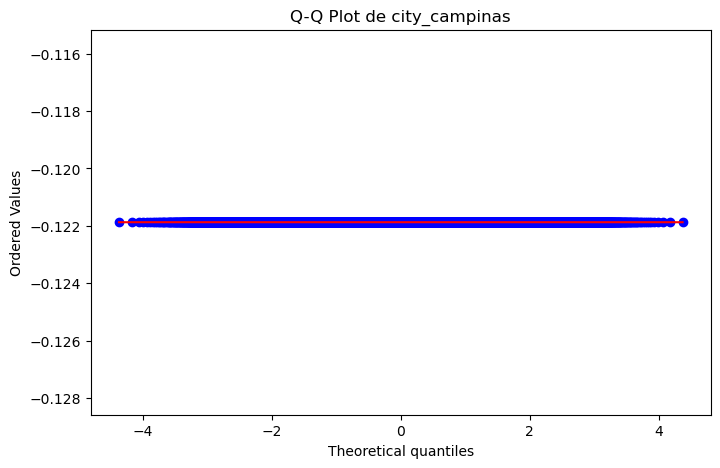

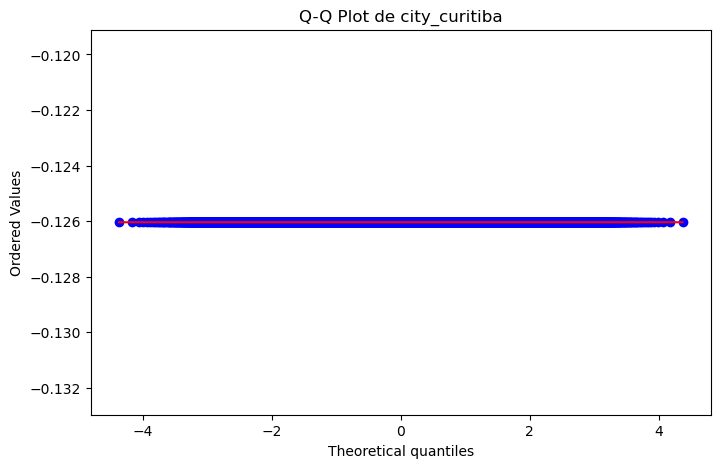

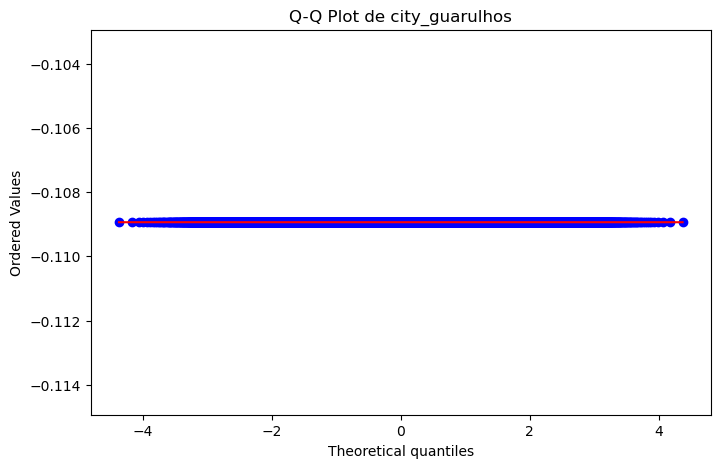

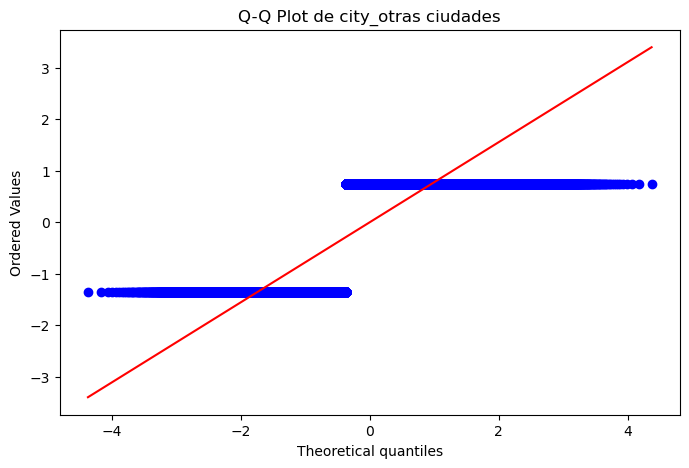

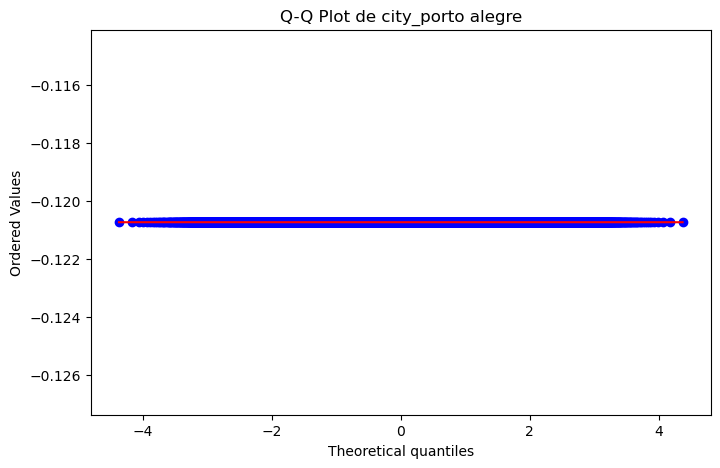

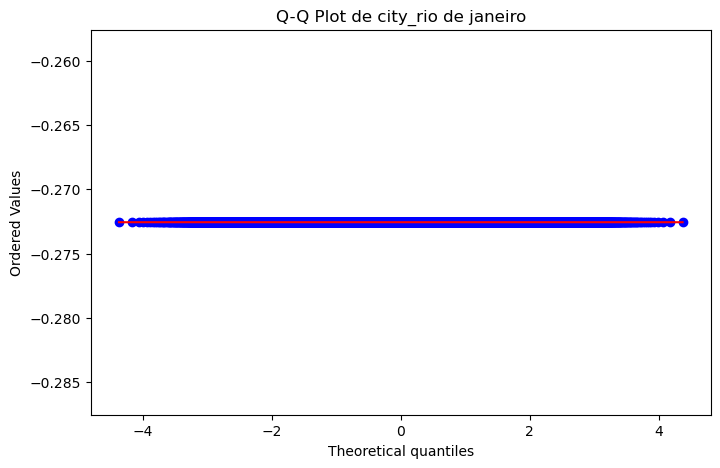

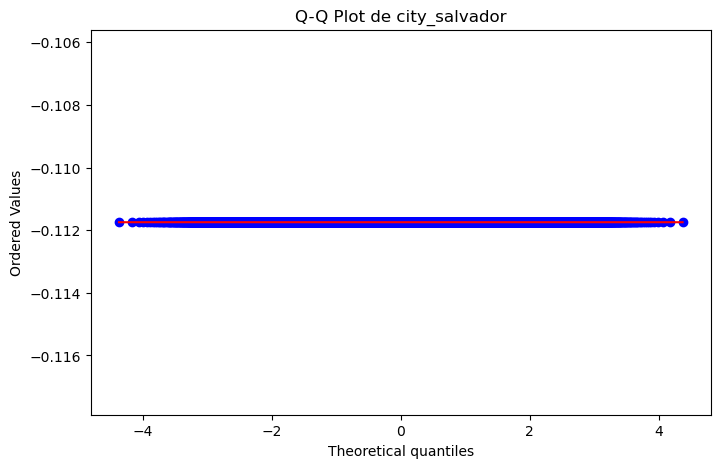

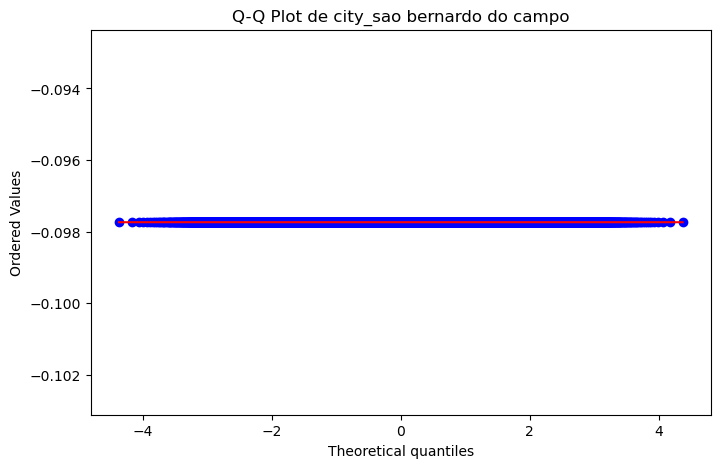

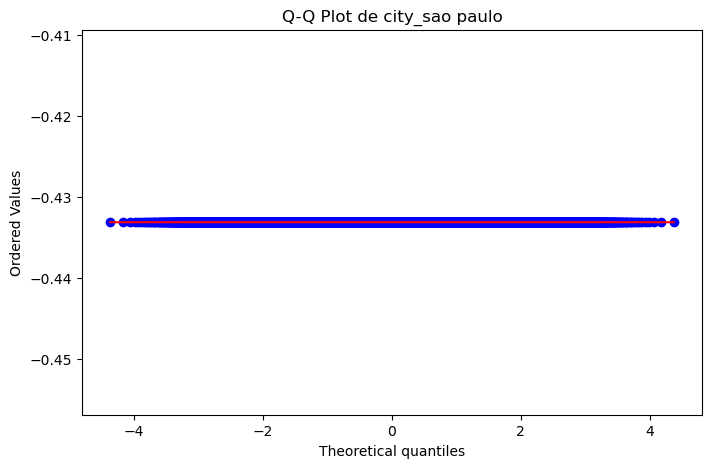

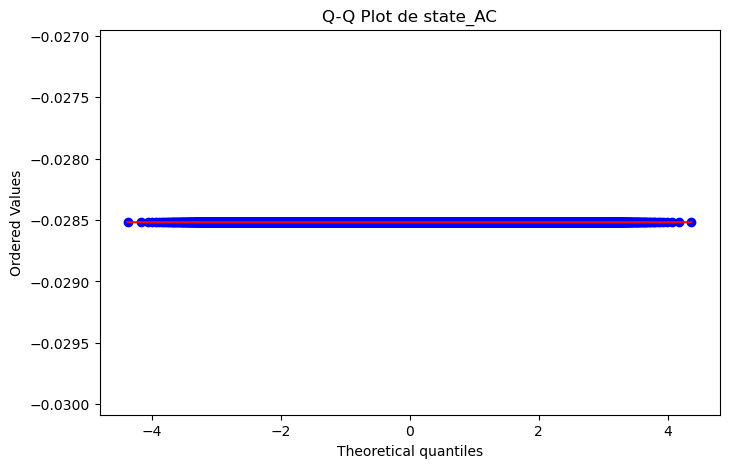

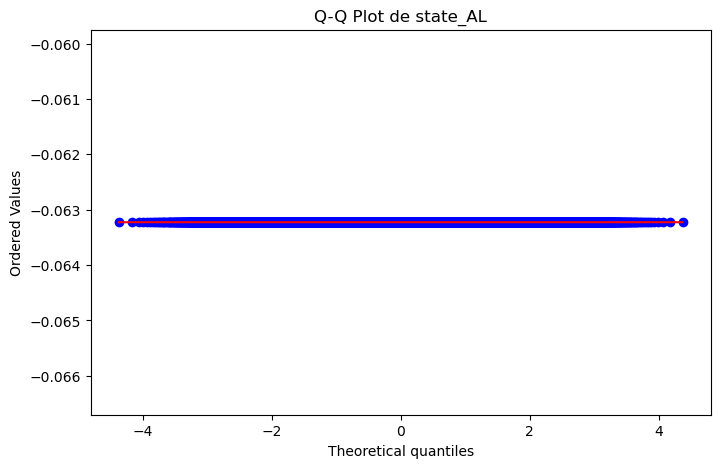

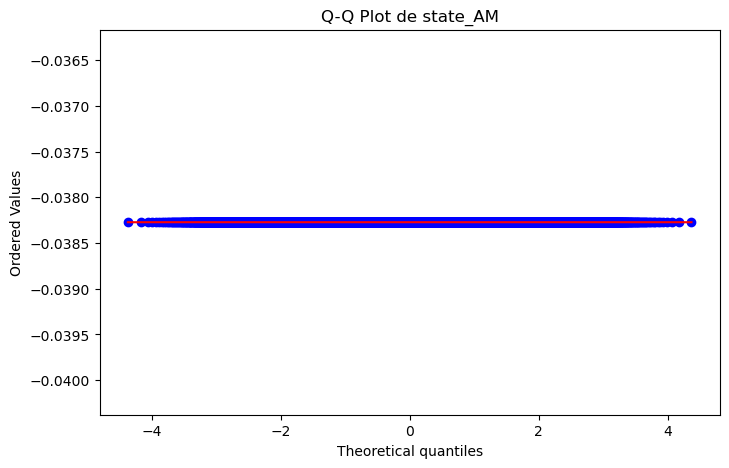

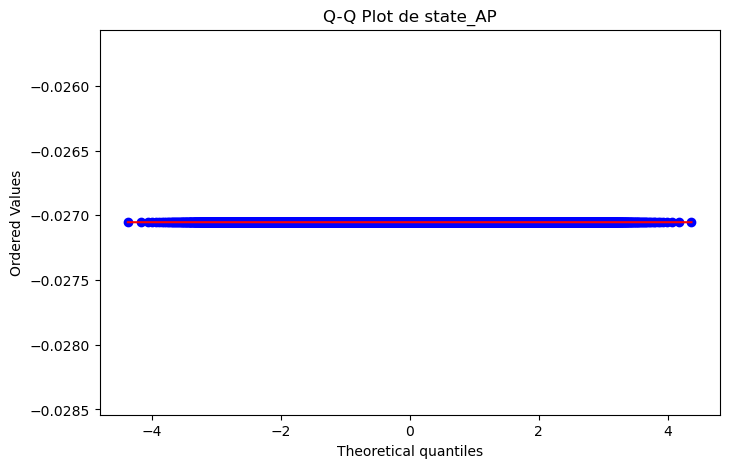

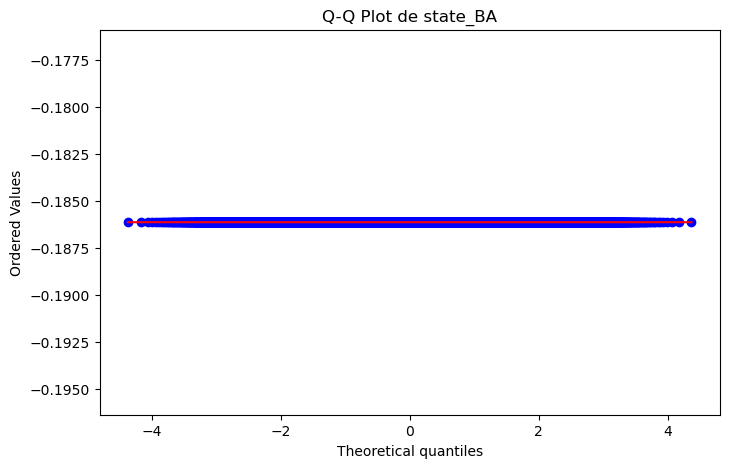

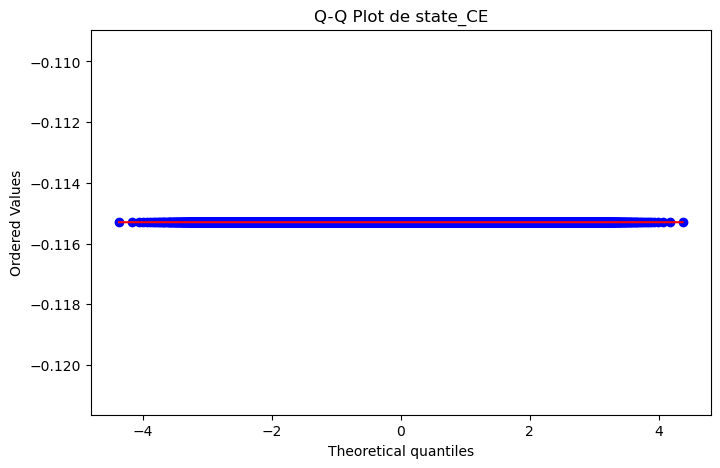

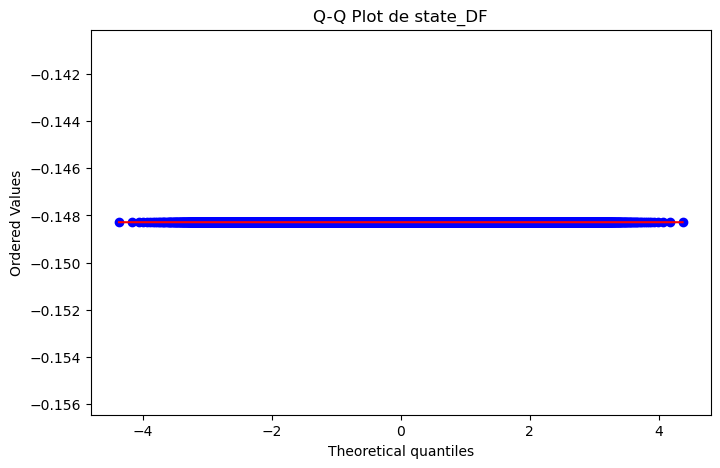

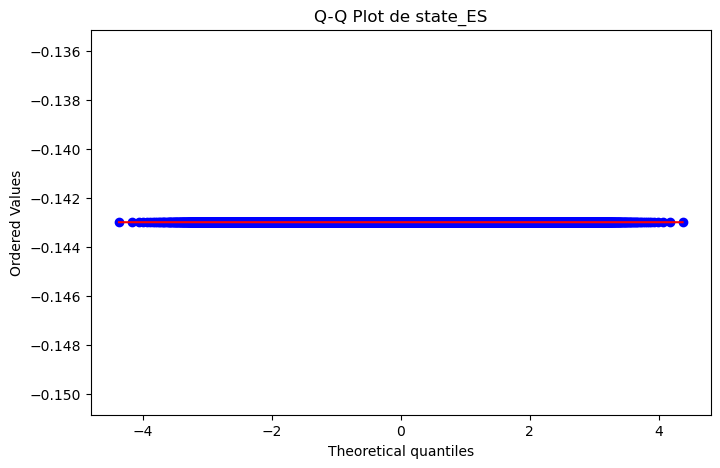

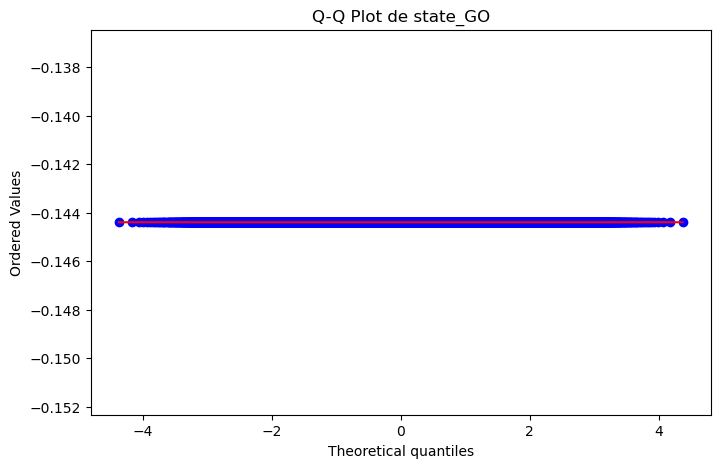

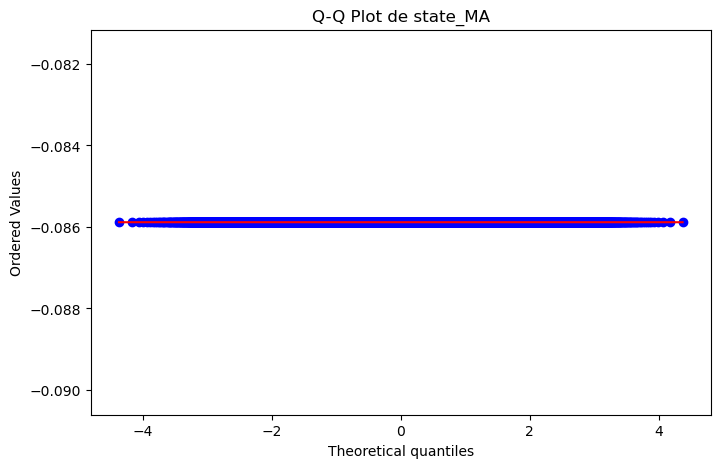

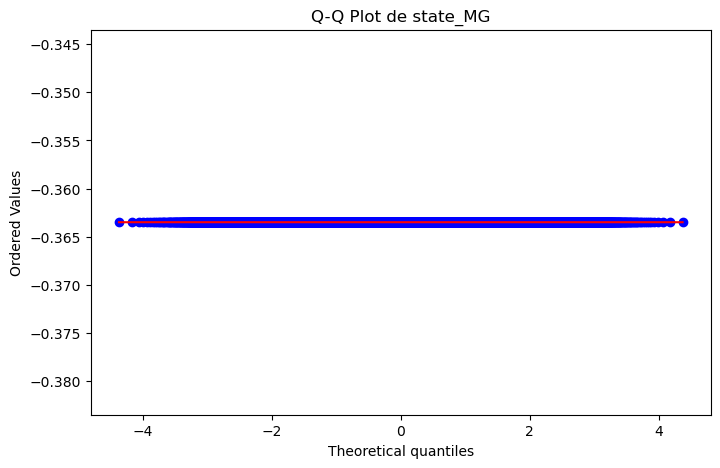

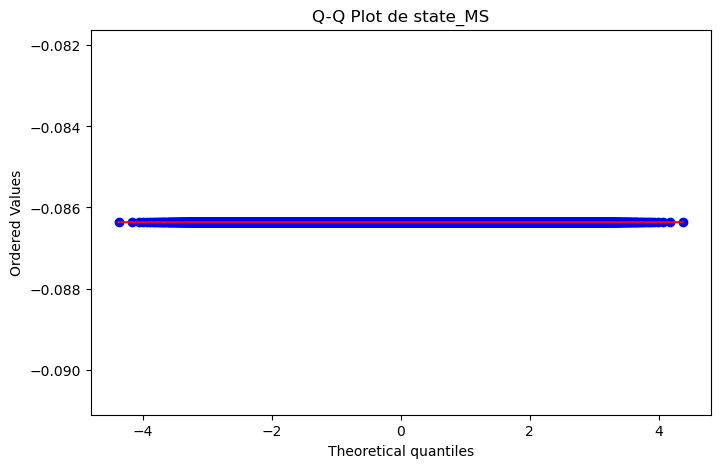

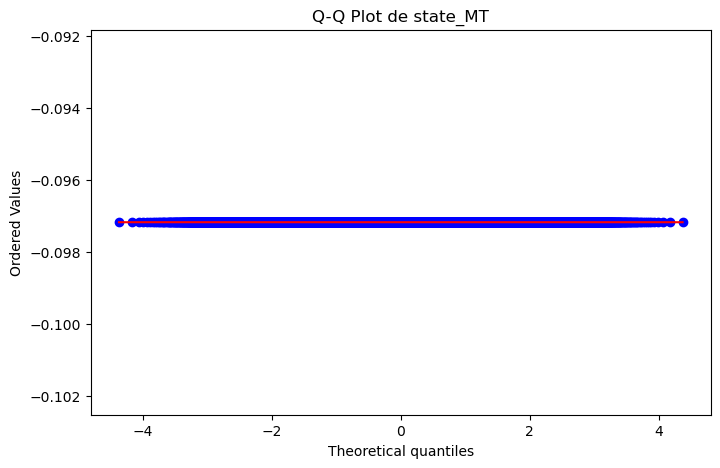

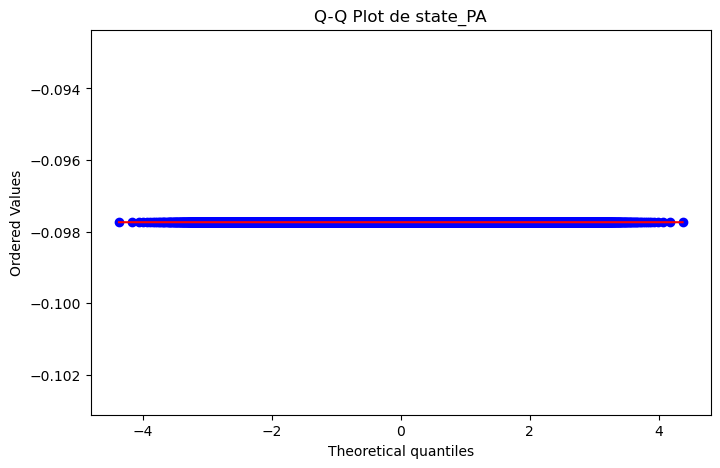

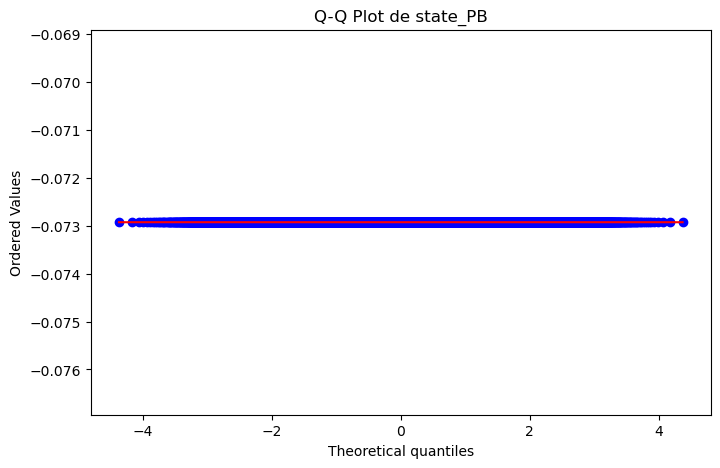

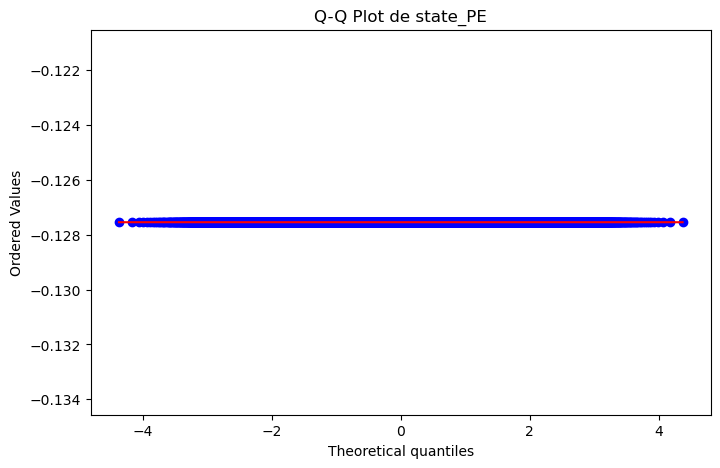

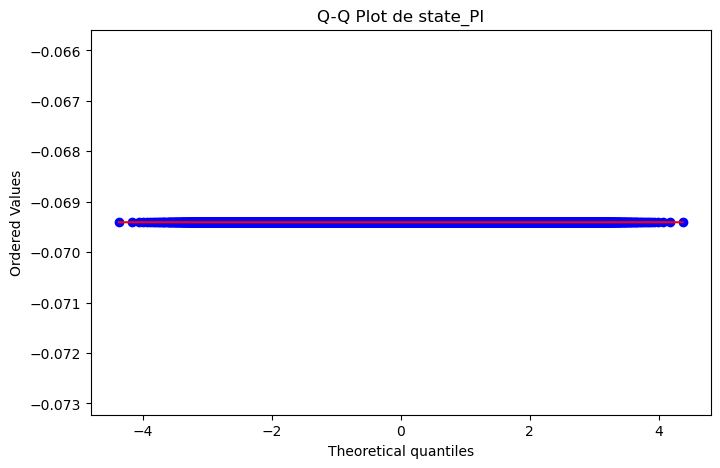

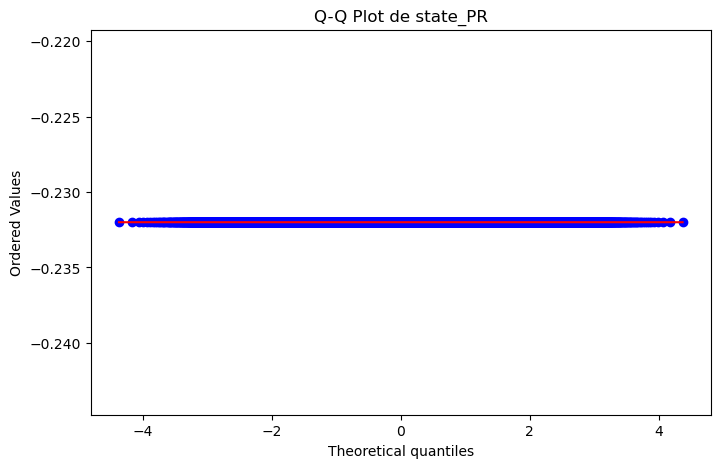

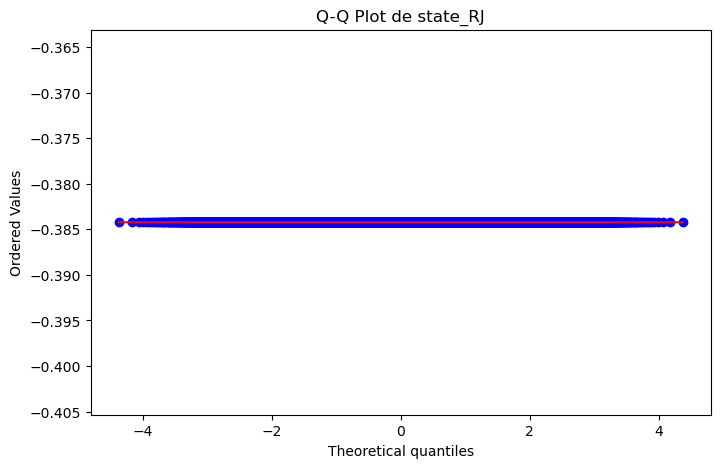

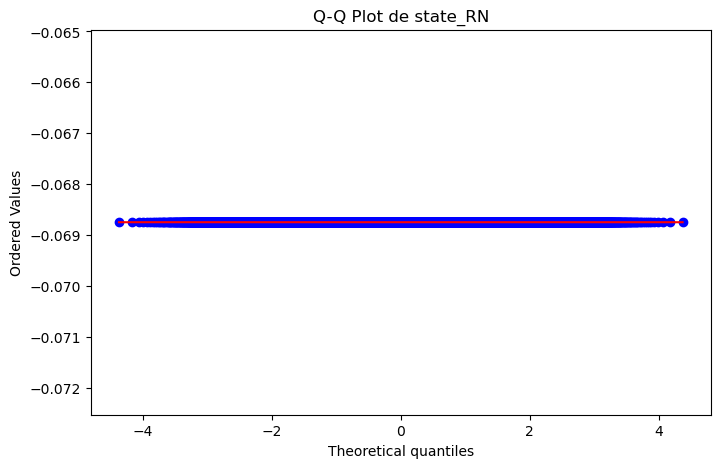

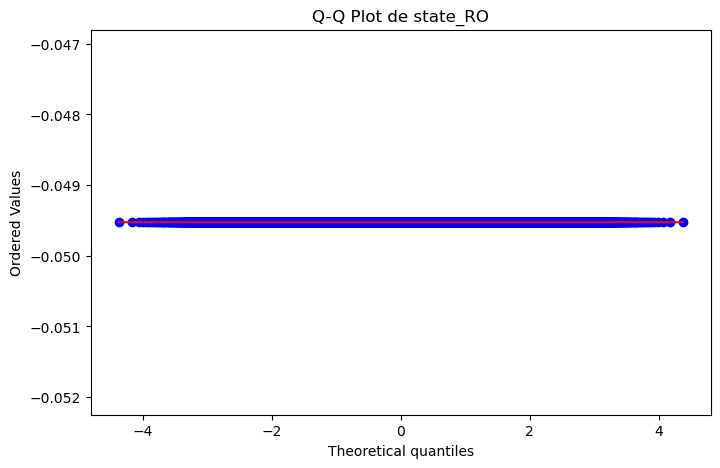

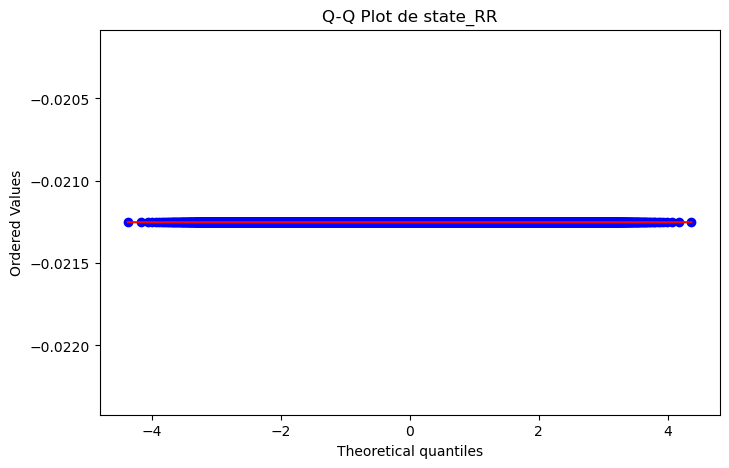

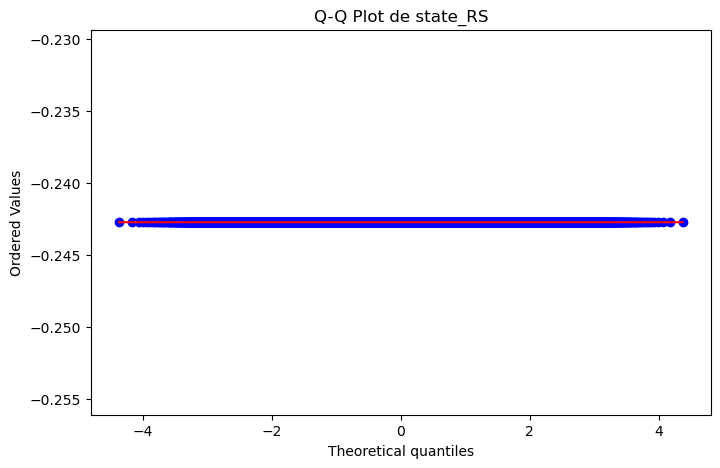

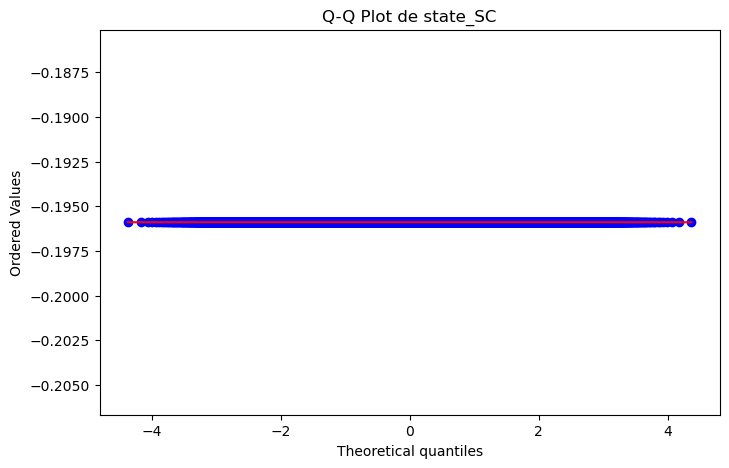

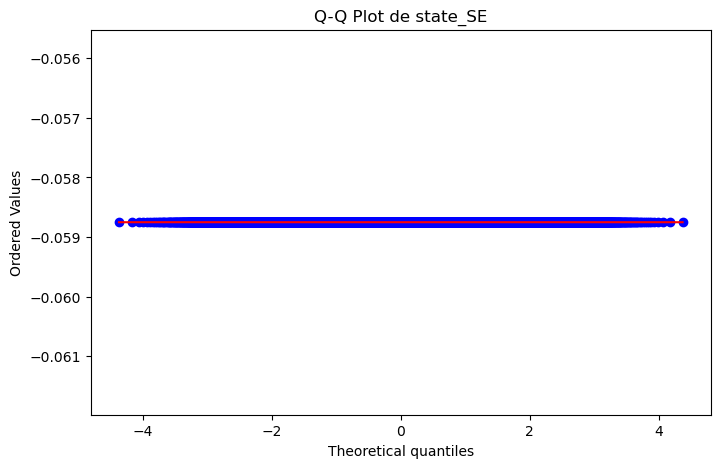

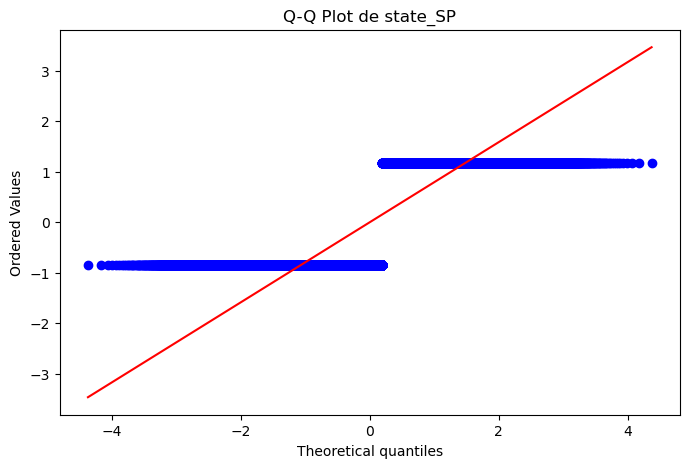

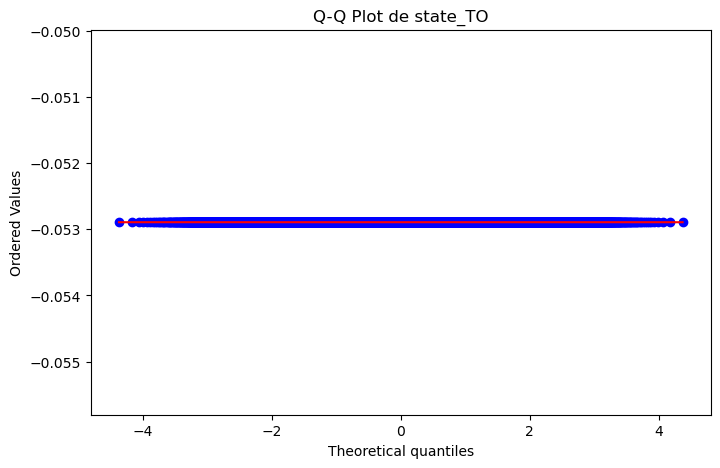

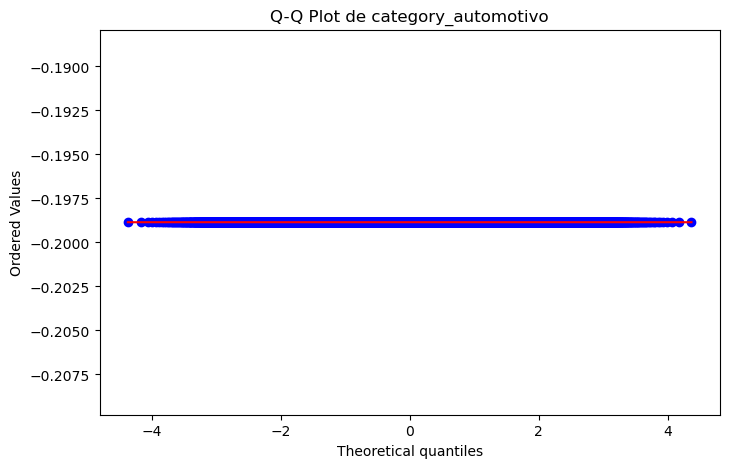

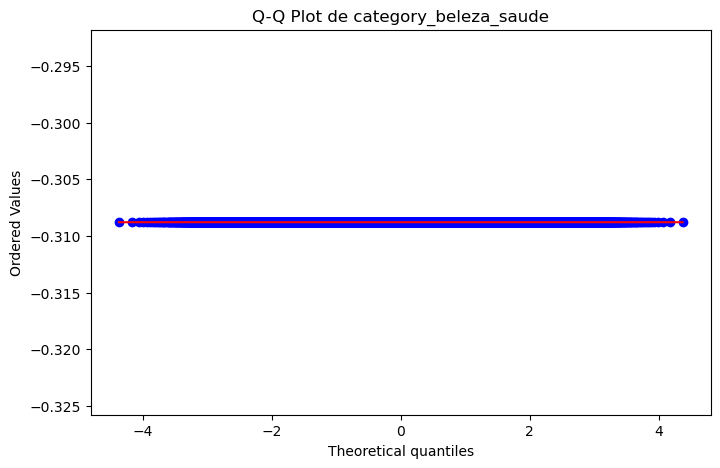

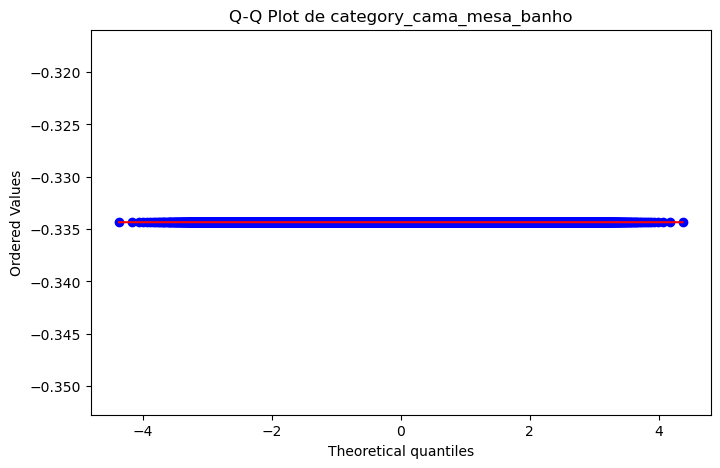

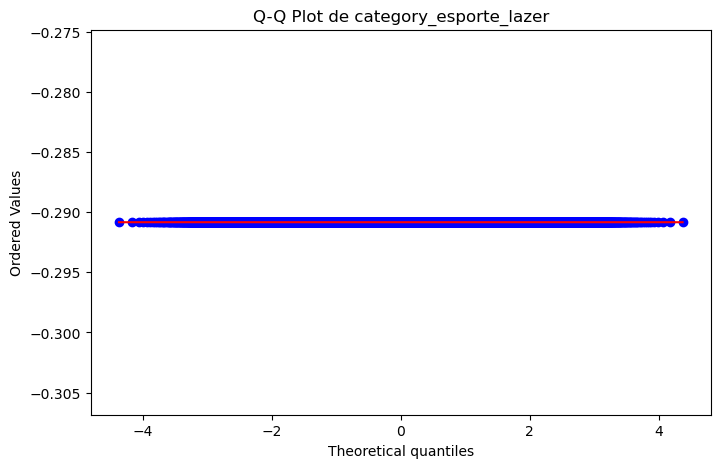

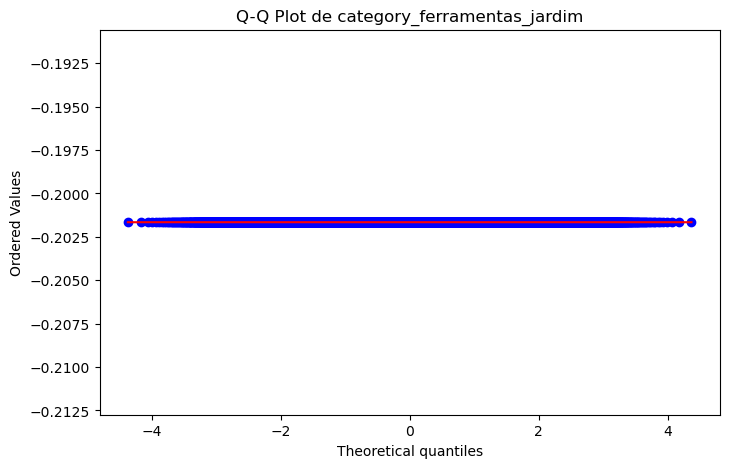

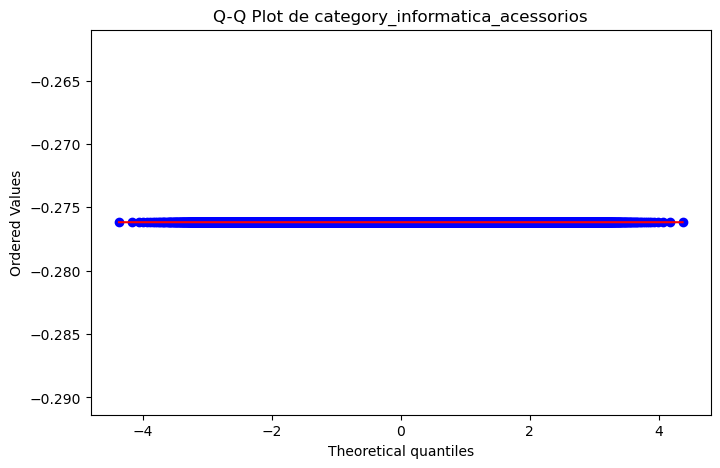

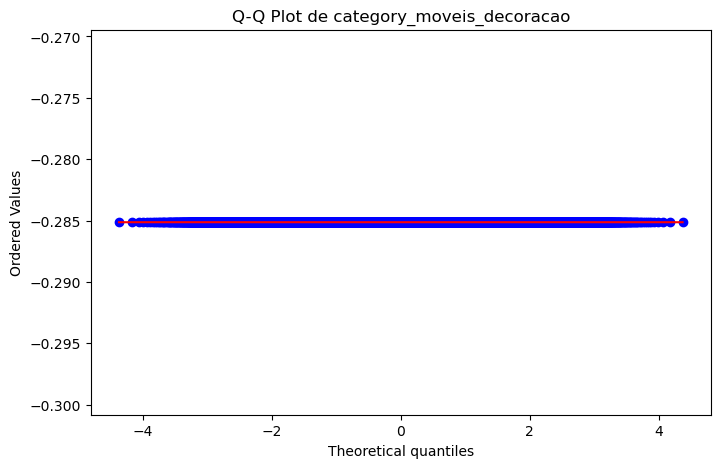

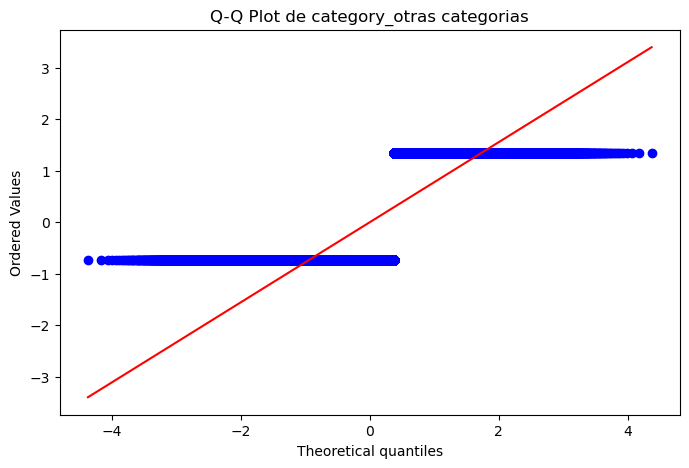

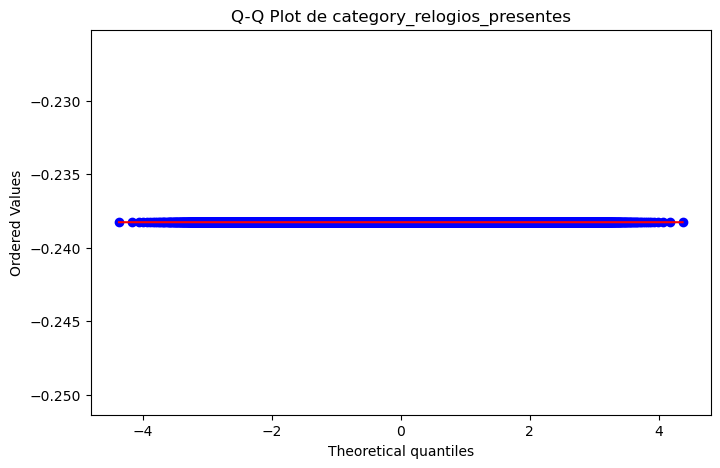

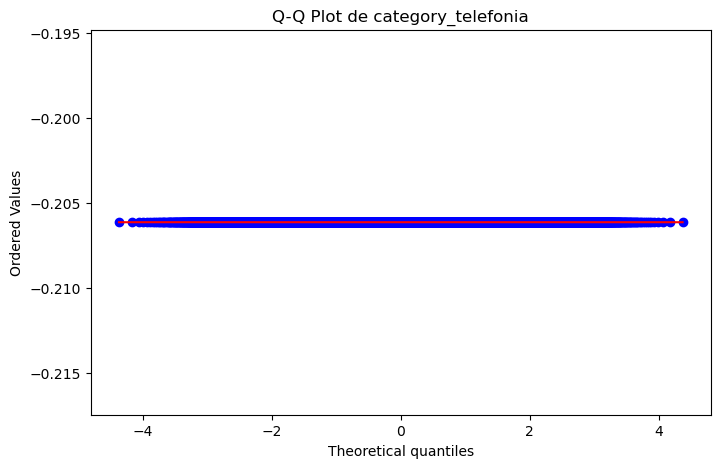

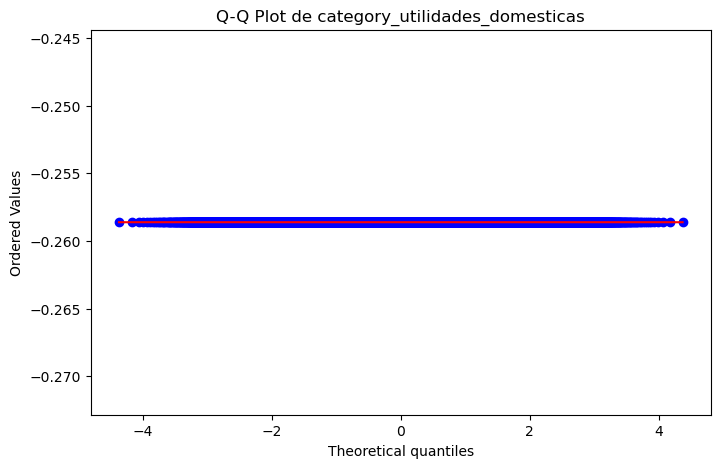

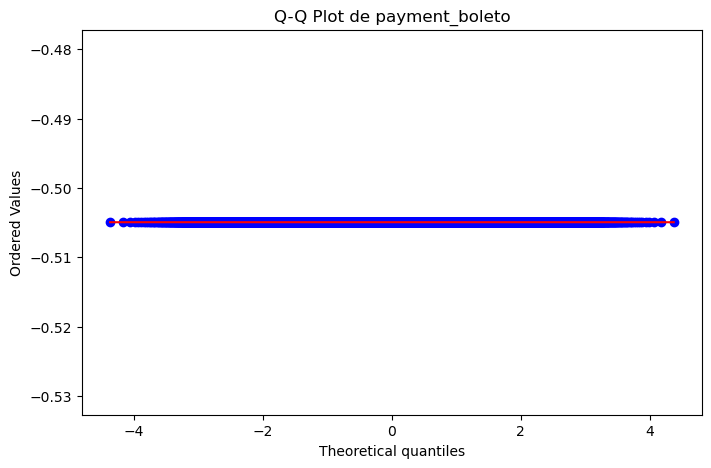

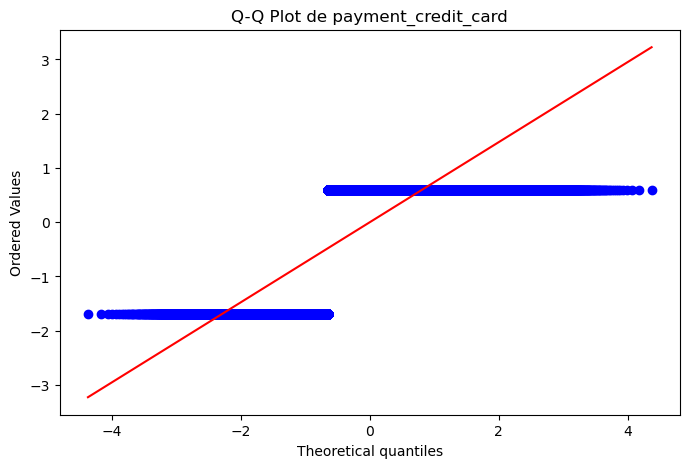

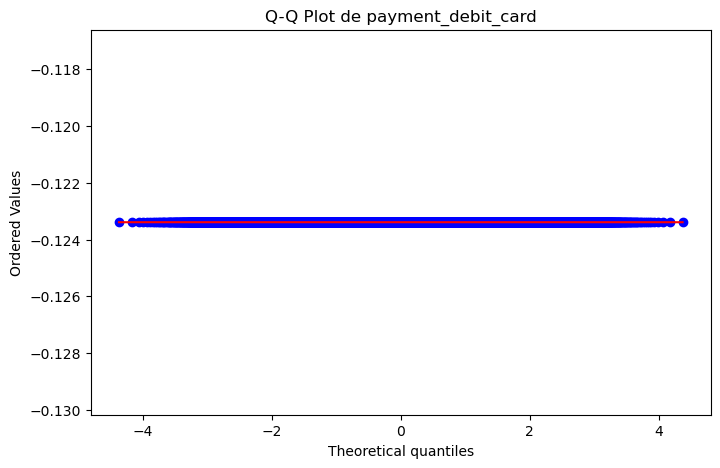

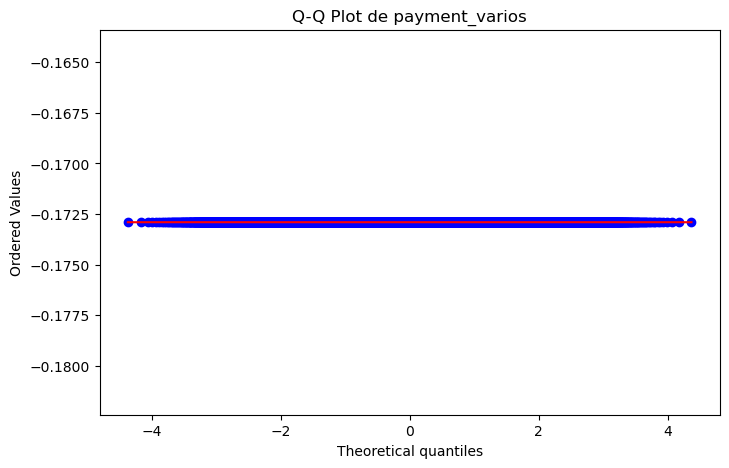

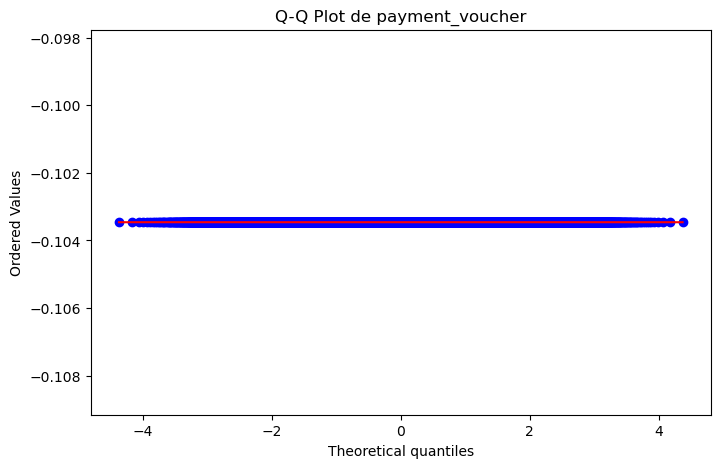

In [45]:
for column in x_estandarizado.columns:
    data = x_estandarizado[column]
    
    plt.figure(figsize=(8, 5))
    probplot(data, plot=plt)
    plt.title(f'Q-Q Plot de {column}')
    plt.show()

In [46]:
x_estandarizado.to_csv('df_formula.csv', index=False)